In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [ ]:
file_id = "1cZVzj7tbAFt5aYnwvStBLtF_JwZ40TTh"
file_path = f"https://drive.google.com/uc?id={file_id}"


df = pd.read_csv(file_path)
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2649


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


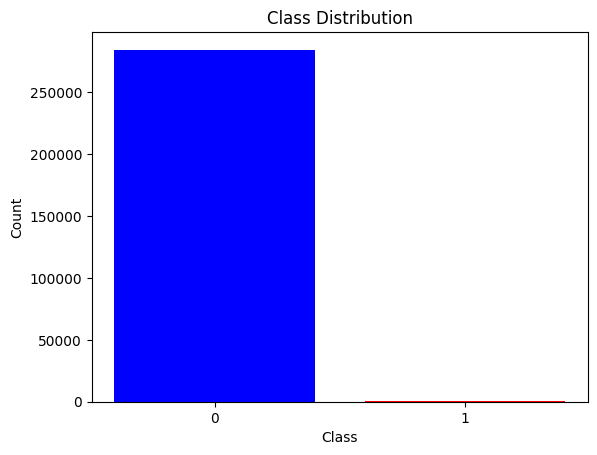

In [ ]:
import matplotlib.pyplot as plt

class_counts = df['Class'].value_counts()

# Plotting
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_counts.index)
plt.show()


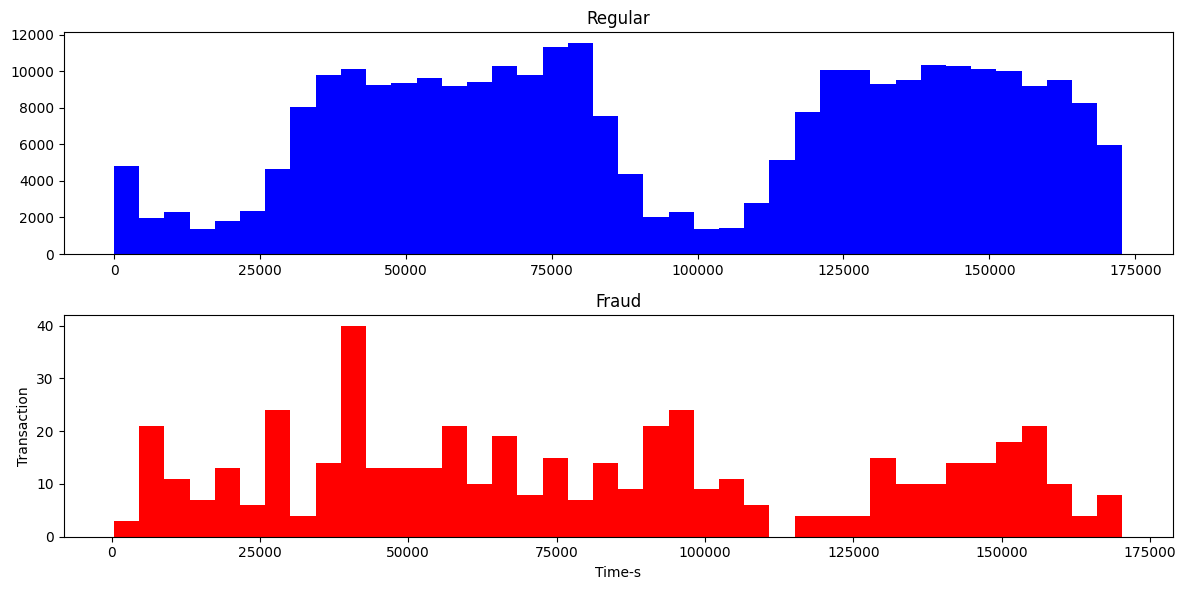

In [ ]:
from IPython.core.pylabtools import figsize
# Plotting Class according to Time

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins=40

ax[0].hist(df['Time'][df['Class']==0], bins=num_bins, color='b')
ax[1].hist(df['Time'][df["Class"]==1], bins=num_bins, color='r')

ax[0].set_title('Regular')
ax[1].set_title('Fraud')

plt.xlabel('Time-s')
plt.ylabel('Transaction')
plt.tight_layout()

In [ ]:
# Having Time and Amount in the same scale

df_clean = df.copy()

std_scaler = StandardScaler()
df_clean["std_amount"]=std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time']=std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))
df_clean.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
# Separating the data set in train and validation

X = df_clean.drop("Class", axis=1)
y = df['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_rus).value_counts())

Class
0    369
1    369
Name: count, dtype: int64


Normalized confusion matrix


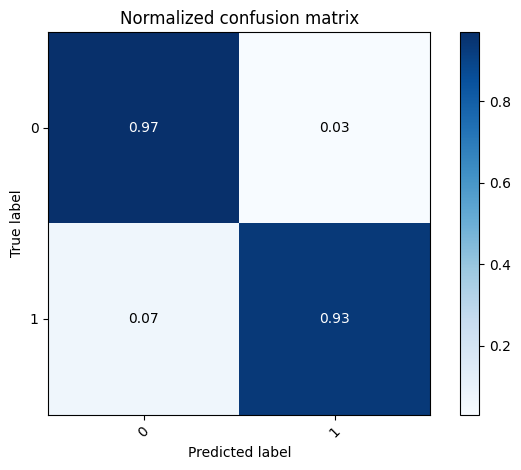

Classification report:
               precision    recall  f1-score   support

           0     0.9999    0.9683    0.9839     71079
           1     0.0486    0.9350    0.0924       123

    accuracy                         0.9683     71202
   macro avg     0.5242    0.9516    0.5381     71202
weighted avg     0.9982    0.9683    0.9823     71202

Accuracy: 0.9683
AUC: 0.9516


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Instantiating the model
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# Predicting using the model
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

# Plotting Confusion Matrix 
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting Confusion Matrix
plot_confusion_matrix(y_val, y_pred, classes=model.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

# Printing Classification Report
print("Classification report:\n", classification_report(y_val, y_pred, digits=4))

# Printing Model Accuracy
print("Accuracy: {:.4f}".format(accuracy_score(y_val, y_pred)))

# Printing Area Under Curve (AUC)
print("AUC: {:.4f}".format(roc_auc_score(y_val, y_pred)))
